# Walmart Sales Prediction

## Introduction
Predicting future sales for a company is one of the most important aspects of strategic planning. We would like to analyze how internal and external factors of one of the biggest companies in the US can affect their Weekly Sales in the future. This model tries to achieve an approximate weekly sales prediction looking at previous years performance per Store on a weekly basis.

The data collected ranges from 2010 to 2012, where 45 Walmart stores across the country were included in this analysis. It is important to note that we also have external data available like CPI,Unemployment Rate and Fuel Prices in the region of each store which, hopefully, help us to make a more detailed analysis.
Source: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

## Data Exploration
We had access to four different data sets from Kaggle.com about the company. These data sets contained information about the stores,departments,temperature, unemployment etc. We will explain each one of the data sets in more detail with each one of its features.
Stores:
Store: The store number. Range from 1-45.
 Type: Three types of stores ‘A’, ‘B’ or ‘C’.
 Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging   from 34,000 to 210,000.
Train:
-Date: The date of the week where this observation was taken . -Weekly_Sales: The sales recorded during that Week.
-Store: The store which observation in recorded 1-45.
-Dept: One of 1-99 that shows the department.
-IsHoliday: Boolean value representing a holiday week or not.
Features: -Temperature:Temperature of the region during that week.
-Fuel_Price: Fuel Price in that region during that week.
-MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.
-CPI: Consumer Price Index during that week.
-Unemployment: The unemployment rate during that week in the region of the store.

The test data have the same fields as the Train data, only the Weekly_Sales are empty.


In [3]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from matplotlib import dates
import datetime as dt
import matplotlib.dates as mdates
import plotly
import cufflinks as cf
cf.go_offline()
import seaborn as sns

In [4]:
#Loading files to work with
train= pd.read_csv("train.csv")
stores= pd.read_csv("stores.csv")
features= pd.read_csv("features.csv")

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Data deep dive
A deeper dive into the data set:
We had taken four different datasets of Walmart from Kaggle.com containing the information about the stores, departments, average temperature in that particular region, CPI, day of the week, sales and mainly indicating if that week was a holiday. Let us explain each dataset in detail.
Stores: The no. of attributes in this dataset is 3.
They are store number, type of store and the size of store.
Output attribute is the size of store.
There are 45 stores whose information is collected.
Stores are categorized into three such as A, B and C, which we assume it to be superstores containing different types of products.
The store size would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.
Train: This is the historical training data, which covers to 2010-02-05 to 2012-11-01.
It consists of the store and department number.
Date of the week.
Weekly sales in USD for the given department in the given store.
Also data denoting if the week is a special holiday week by displaying true or false.
The department no. ranges from 1-99.
The dataset consists of many records that are blank. Hence they were not considered for analysis.
The output attribute is sales and the data denoting special holiday week.
Test: particular store.
Un-employment rate in that particular region.
Data denoting if that particular week is a special holiday week.
This dataset is similar to train data, except that the sales column has been eliminated.
It is used to predict the sales for each triplet of store and department.
Features: This file contains regional activity for the given dates such as average temperature in that region which is measured which ranges from -7 to 100 F.
Cost of fuel in that particular region is available in the dataset from which we can identify that if the fuel is higher in that particular region, whether it affects the sales as customer use automobiles to reach the store.
Customer price index (CPI) which is used to measure the changes in price level in that 5 Markdowns are available in this dataset which denotes the promotional markdowns which Walmart is running. There are 5 markdowns in that particular duration in the dataset.
The output attribute is Markdowns and data denoting if it’s a holiday week.
Among these 5 files, Features and train files contain every necessary elements to do the predication. So we are going to take advantage of them.

In [8]:
#Our first step will be to join our two tables by Store which is the common column.

In [9]:
train=pd.merge(train,stores,how='inner', on='Store')

In [10]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


## Feature Engineering 
  In this step, we will conduct some feature engineering. We will use the features that our data currently has but tweak them in a way that makes our analysis easier. The most important objective in this step is to generate new features that will help us produce a better model- Include a week number of the year

In [11]:
# Adding a new column Week number of the year

In [12]:
# convert date to date time
train['Date']=pd.to_datetime(train['Date'])

In [13]:
features['Date']=pd.to_datetime(features['Date'])

In [14]:
train['WeekNum'] = train['Date'].dt.week

We have also noticed that some Weekly Sales contain negative values, after analyzing the data we have concluded that those refer to Returned Products from previous weeks. Add a Returns Column

In [15]:
def myfunc(sales):
    if sales<0:
        return sales
    else:
        return 0

In [16]:
train['Returns']= train['Weekly_Sales'].apply(myfunc)

In [17]:
train.head()
#train[train['Weekly_Sales']<-860]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns
0,1,1,2010-02-05,24924.50,False,A,151315,5,0.0
1,1,1,2010-02-12,46039.49,True,A,151315,6,0.0
2,1,1,2010-02-19,41595.55,False,A,151315,7,0.0
3,1,1,2010-02-26,19403.54,False,A,151315,8,0.0
4,1,1,2010-03-05,21827.90,False,A,151315,9,0.0


In [18]:
def myfunc1(sales):
    if sales>0:
        return sales
    else:
        return 0

In [19]:
train['Weekly_Sales']= train['Weekly_Sales'].apply(myfunc1)

In [20]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns
0,1,1,2010-02-05,24924.50,False,A,151315,5,0.0
1,1,1,2010-02-12,46039.49,True,A,151315,6,0.0
2,1,1,2010-02-19,41595.55,False,A,151315,7,0.0
3,1,1,2010-02-26,19403.54,False,A,151315,8,0.0
4,1,1,2010-03-05,21827.90,False,A,151315,9,0.0


In [21]:
# Merge train an feature
train=pd.merge(train,features,how='inner', on=['Store','Date','IsHoliday'])

In [22]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,5,0.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,5,0.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,5,0.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,5,0.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,5,0.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [23]:
# replace NaN with zero for all 5 markdown columns
train['MarkDown1']=train['MarkDown1'].fillna(0)
train['MarkDown2']=train['MarkDown2'].fillna(0)
train['MarkDown3']=train['MarkDown3'].fillna(0)
train['MarkDown4']=train['MarkDown4'].fillna(0)
train['MarkDown5']=train['MarkDown5'].fillna(0)

In [24]:
#Range Weekly Sales: Divide our sales into five different groups
def rangefunc(sales):
    if sales<0:
        return 'negative'
    elif (sales>0) & (sales<=10000):
        return 'A'
    elif (sales>10000) & (sales<=25000):
        return 'B'
    elif (sales>25000) & (sales<=50000):
        return 'C'
    elif (sales>50000) & (sales<=75000):
        return 'D'
    
    else:
        return 'E'


train['Rank'] =train['Weekly_Sales'].apply(rangefunc)

In [25]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Rank
0,1,1,2010-02-05,24924.50,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,B
1,1,2,2010-02-05,50605.27,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,D
2,1,3,2010-02-05,13740.12,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,B
3,1,4,2010-02-05,39954.04,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,C
4,1,5,2010-02-05,32229.38,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,C


In [26]:
#Find the max and min sales per year, per store type

In [27]:
train.groupby(['Store'])[['Weekly_Sales']].sum().sort( columns='Weekly_Sales', ascending=False).head(10)
#total=total.sort( columns='Weekly_Sales', ascending=False).head(10)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Weekly_Sales
Store,
20,3.014014e+08
4,2.995453e+08
14,2.890019e+08
13,2.865180e+08
2,2.753872e+08
10,2.716241e+08
27,2.538572e+08
6,2.237586e+08
1,2.224068e+08


In [28]:
train.groupby(['Store'])[['Weekly_Sales']].mean().sort( columns='Weekly_Sales', ascending=False).head(10)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Weekly_Sales
Store,
20,29508.652971
4,29161.338522
14,28785.046259
13,27355.160432
2,26898.530524
10,26332.923838
27,24827.109044
6,21913.484315
1,21710.929985


In [29]:
train.groupby(['Type'])[['Weekly_Sales']].sum().sort( columns='Weekly_Sales', ascending=False).head(10)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Weekly_Sales
Type,
A,4.331057e+09
B,2.000742e+09
C,4.055080e+08


In [30]:
train.groupby(['Size'])[['Weekly_Sales']].sum().sort( columns='Weekly_Sales', ascending=False).head(10)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Weekly_Sales
Size,
203819,4.006543e+08
203742,3.014014e+08
205863,2.995453e+08
200898,2.890019e+08
219622,2.865180e+08
202307,2.753872e+08
126512,2.716241e+08
204184,2.538572e+08
202505,2.237586e+08


In [31]:
#Generate some Exploratory Plots


In [32]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Rank
0,1,1,2010-02-05,24924.50,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,B
1,1,2,2010-02-05,50605.27,False,A,151315,5,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,D


In [33]:
# creating  a new year column from the Date 
train['year'] = train['Date'].dt.year

In [34]:
trainstore1=train[train.Store==1 & (train.Dept==1)]


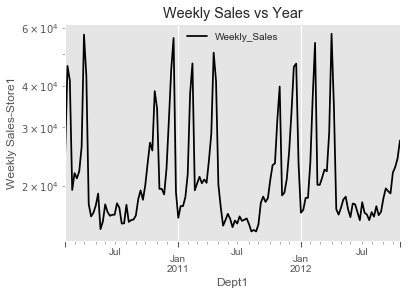

In [35]:
plt.style.use('ggplot')
f = plt.figure()
trainstore1.plot(x='Date',y='Weekly_Sales',title='Weekly Sales vs Year',color='black',logy=True)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Dept1")
plt.ylabel("Weekly Sales-Store1")



In [36]:
slope,intercept=np.polyfit(train['CPI'],train['Weekly_Sales'],1)

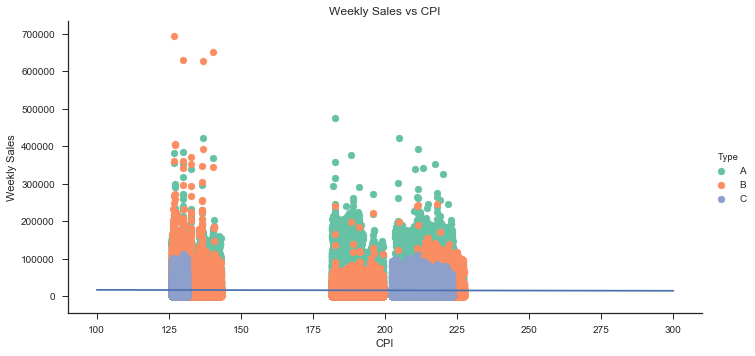

In [37]:
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=train, hue='Type',size=5,aspect=2,palette='Set2')
#fg.map(sns.regplot, 'CPI', 'Weekly_Sales',fit_reg=True)
x=np.array([100,300])
y=slope*x+intercept
plt.plot(x,y)

fg.map(plt.scatter, 'CPI', 'Weekly_Sales').add_legend()
plt.ylabel("Weekly Sales")
plt.title('Weekly Sales vs CPI')
plt.show()


In [46]:
traincpi=train[train['year']==2012]

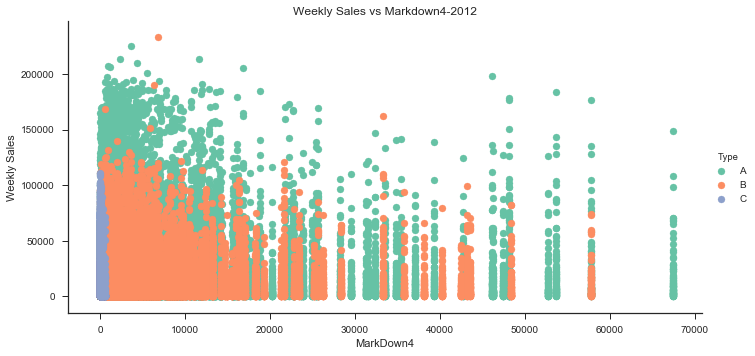

In [47]:
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=traincpi, hue='Type',size=5,aspect=2,palette='Set2')
#fg.map(sns.regplot, 'CPI', 'Weekly_Sales',fit_reg=True)
#x=np.array([100,300])
#y=slope*x+intercept
#plt.plot(x,y)

fg.map(plt.scatter, 'MarkDown4', 'Weekly_Sales').add_legend()
plt.ylabel("Weekly Sales")
plt.title('Weekly Sales vs Markdown4-2012')
plt.show()


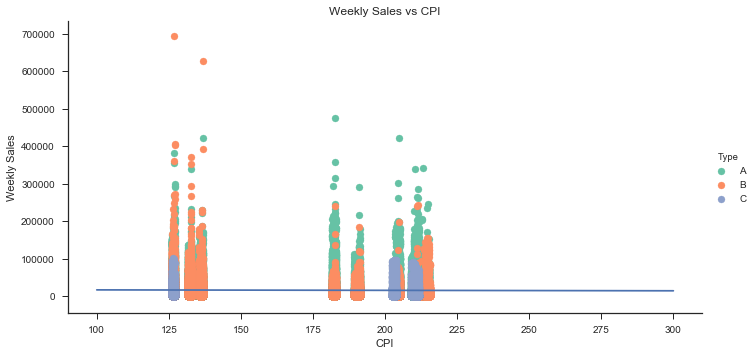

In [201]:
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=traincpi, hue='Type',size=5,aspect=2,palette='Set2')
#fg.map(sns.regplot, 'CPI', 'Weekly_Sales',fit_reg=True)
x=np.array([100,300])
y=slope*x+intercept
plt.plot(x,y)

fg.map(plt.scatter, 'CPI', 'Weekly_Sales').add_legend()
plt.ylabel("Weekly Sales")
plt.title('Weekly Sales vs CPI')
plt.show()

In [202]:
slope1,intercept1=np.polyfit(train['Unemployment'],train['Weekly_Sales'],1)


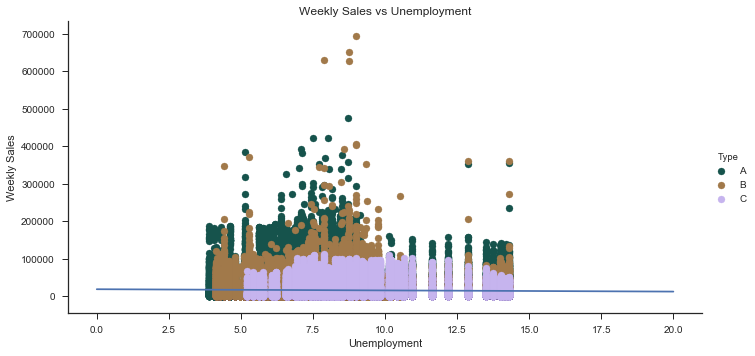

In [203]:
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=train, hue='Type',size=5,aspect=2,palette='cubehelix')
x=np.array([0,20])
y=slope1*x+intercept1
plt.plot(x,y)

fg.map(plt.scatter, 'Unemployment', 'Weekly_Sales').add_legend()
plt.title('Weekly Sales vs Unemployment')
plt.ylabel("Weekly Sales")
plt.show()

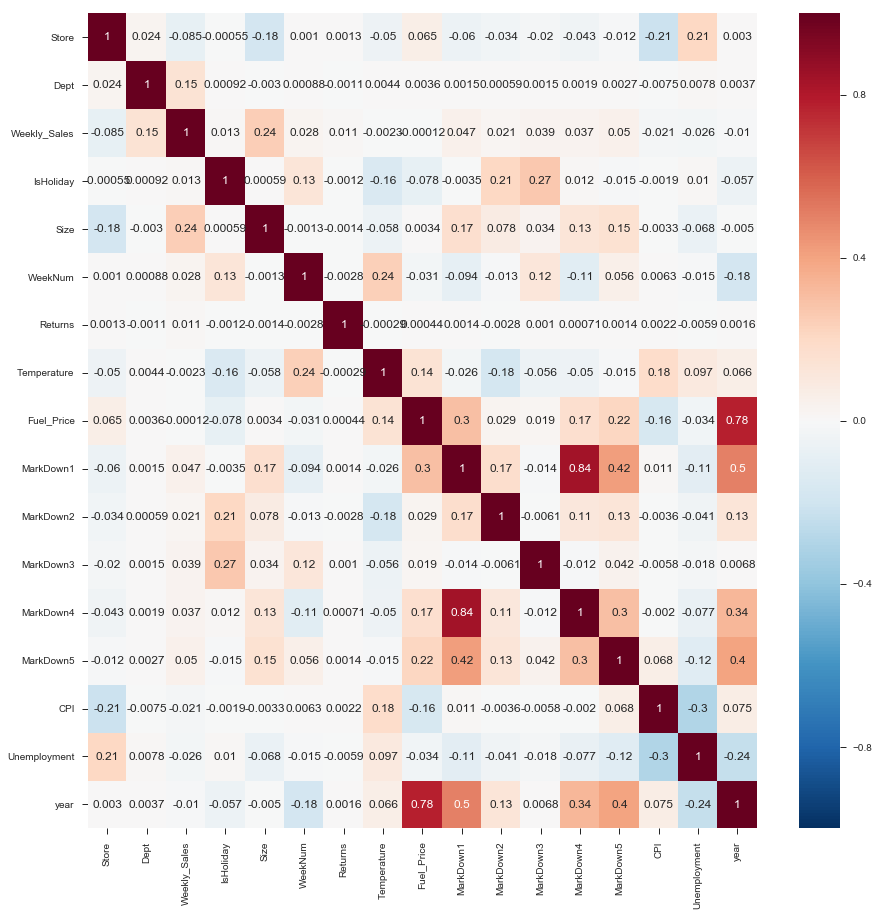

In [204]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [205]:
slope3,intercept3=np.polyfit(train['WeekNum'],train['Weekly_Sales'],1)


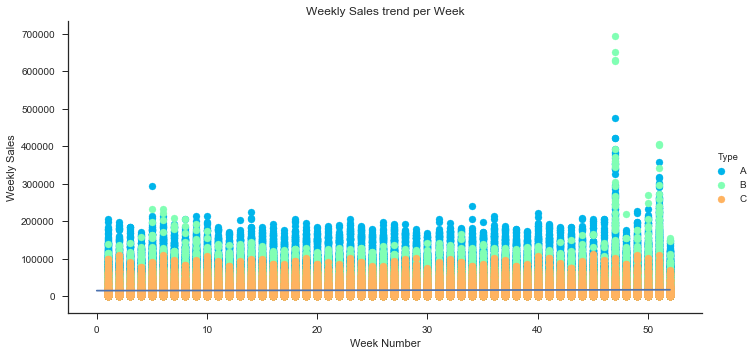

In [206]:
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=train, hue='Type',size=5,aspect=2,palette='rainbow')
#fg.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
x=np.array([0,52])
y=slope3*x+intercept3
plt.plot(x,y)
#fg.map(sns.regplot, 'WeekNum', 'Weekly_Sales',fit_reg=True)
fg.map(plt.scatter, 'WeekNum', 'Weekly_Sales').add_legend()
plt.title('Weekly Sales trend per Week')
plt.ylabel("Weekly Sales")
plt.xlabel("Week Number")
plt.show()

In [207]:
#plt.style.use('ggplot')
#f = plt.figure()
#train.plot(x='WeekNum',y='Weekly_Sales',title='Weekly Sales vs Day of the week',kind='scatter',color='#377eb8')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.xlabel("Week Number")
#plt.ylabel("Weekly Sales")

In [208]:
def typefunc(type):
    if type=='A':
        return 1
    elif type=='B':
        return 2
    elif type=='C':
        return 3
    
    else:
        return '4'


train['Type_num'] =train['Type'].apply(typefunc)

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



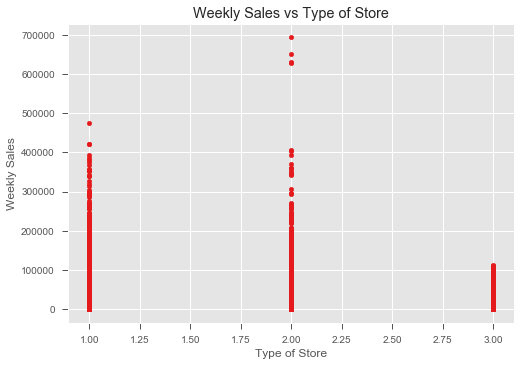

In [43]:
fig = plt.figure(figsize=(20, 20))
plt.style.use('ggplot')
#fig = plt.figure()

train.plot(x='Type_num',y='Weekly_Sales',title='Weekly Sales vs Type of Store',kind='scatter',color='#e41a1c')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Type of Store")
plt.ylabel("Weekly Sales")

In [44]:
trainmaxsales=train.groupby('Date')['Weekly_Sales','IsHoliday'].max()

In [45]:
trainmaxsales.sort_values('Weekly_Sales',ascending=False,inplace=True)

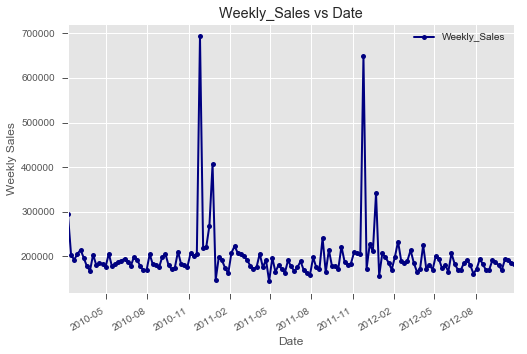

In [46]:
plt.style.use('ggplot')
ax=trainmaxsales.plot(y='Weekly_Sales',lw=2, colormap='jet', marker='.', markersize=10, title='Weekly_Sales vs Date')
ax.set(xlabel='Date', ylabel='Weekly Sales')
plt.show()


We also want to analyze what is the effect of the MarkDowns on the weekly sales of the company. However, as one can see the MarkDowns don’t show an immense correlation with Sales. 

In [140]:
slope1,intercept1=np.polyfit(train['MarkDown4'],train['Weekly_Sales'],1)

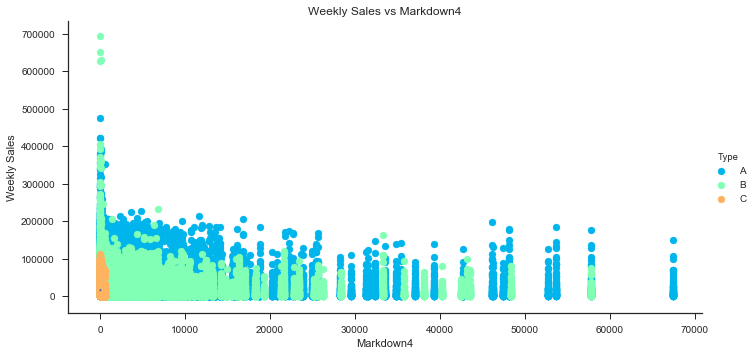

In [147]:
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=train,hue='Type',size=5,aspect=2,palette='rainbow')
#fg.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
x=np.array([0,52])
y=slope3*x+intercept3
plt.plot(x,y)
#fg.map(sns.regplot, 'WeekNum', 'Weekly_Sales',fit_reg=True)
fg.map(plt.scatter,'MarkDown4','Weekly_Sales').add_legend()
plt.title('Weekly Sales vs Markdown4')
plt.ylabel("Weekly Sales")
plt.xlabel("Markdown4")
plt.show()

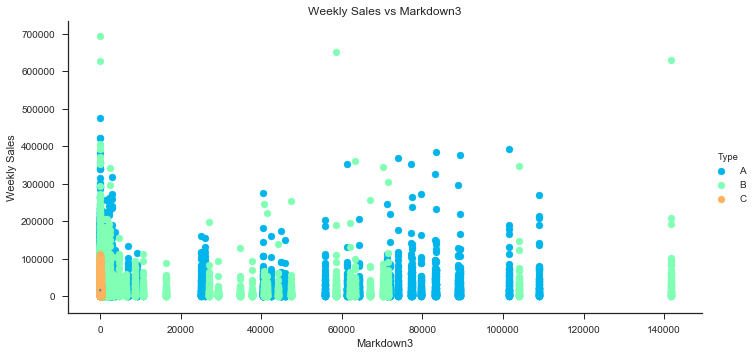

In [149]:
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=train,hue='Type',size=5,aspect=2,palette='rainbow')
#fg.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
x=np.array([0,52])
y=slope3*x+intercept3
plt.plot(x,y)
#fg.map(sns.regplot, 'WeekNum', 'Weekly_Sales',fit_reg=True)
fg.map(plt.scatter,'MarkDown3','Weekly_Sales').add_legend()
plt.title('Weekly Sales vs Markdown3')
plt.ylabel("Weekly Sales")
plt.xlabel("Markdown3")
plt.show()

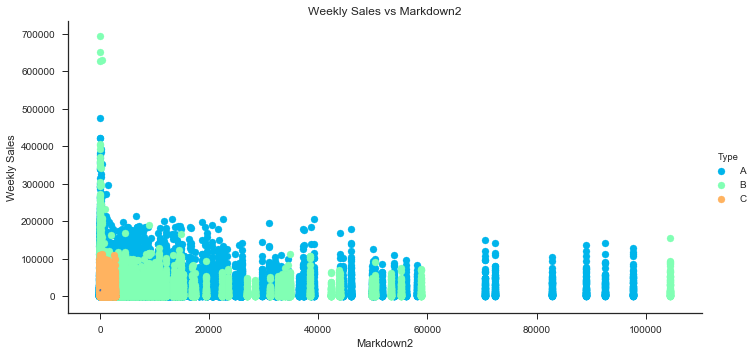

In [150]:
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=train,hue='Type',size=5,aspect=2,palette='rainbow')
#fg.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
x=np.array([0,52])
y=slope3*x+intercept3
plt.plot(x,y)
#fg.map(sns.regplot, 'WeekNum', 'Weekly_Sales',fit_reg=True)
fg.map(plt.scatter,'MarkDown2','Weekly_Sales').add_legend()
plt.title('Weekly Sales vs Markdown2')
plt.ylabel("Weekly Sales")
plt.xlabel("Markdown2")
plt.show()

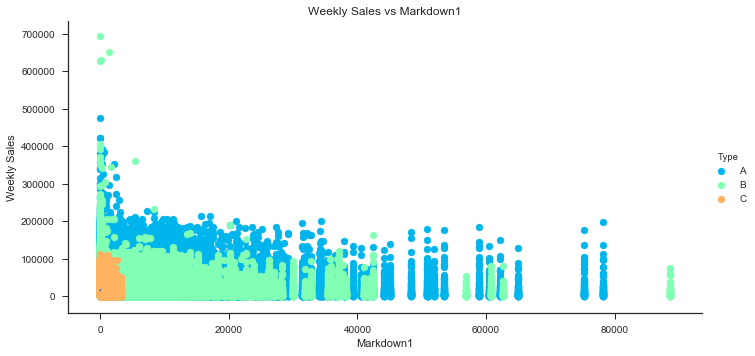

In [151]:
fg = seaborn.FacetGrid(data=train,hue='Type',size=5,aspect=2,palette='rainbow')
#fg.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
x=np.array([0,52])
y=slope3*x+intercept3
plt.plot(x,y)
#fg.map(sns.regplot, 'WeekNum', 'Weekly_Sales',fit_reg=True)
fg.map(plt.scatter,'MarkDown1','Weekly_Sales').add_legend()
plt.title('Weekly Sales vs Markdown1')
plt.ylabel("Weekly Sales")
plt.xlabel("Markdown1")
plt.show()

In [49]:
slope4,intercept4=np.polyfit(train['Fuel_Price'],train['Weekly_Sales'],1)

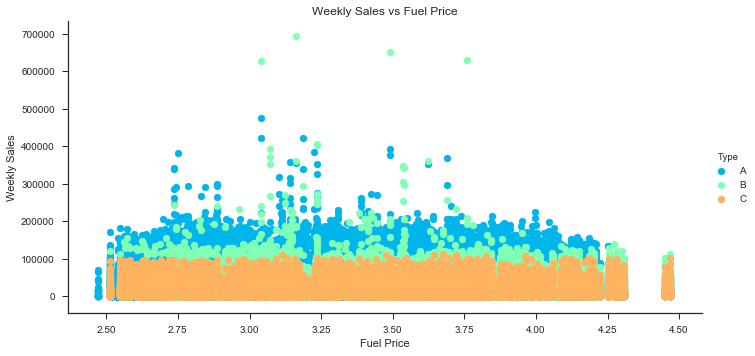

In [50]:
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=train, hue='Type',size=5,aspect=2,palette='rainbow')
#fg.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
#x=np.array([0,5])
#y=slope4*x+intercept4
#plt.plot(x,y)
#fg.map(sns.regplot, 'WeekNum', 'Weekly_Sales',fit_reg=True)
fg.map(plt.scatter, 'Fuel_Price', 'Weekly_Sales').add_legend()
plt.title('Weekly Sales vs Fuel Price')
plt.ylabel("Weekly Sales")
plt.xlabel("Fuel Price")
plt.show()


In [51]:
trainstore20=train[train.Store==20]

In [52]:
trainstore20.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns,Temperature,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Rank,year,Type_num
187335,20,1,2010-02-05,46021.21,False,A,203742,5,0.0,25.92,...,0.0,0.0,0.0,0.0,0.0,204.247194,8.187,C,2010,1
187336,20,2,2010-02-05,85812.69,False,A,203742,5,0.0,25.92,...,0.0,0.0,0.0,0.0,0.0,204.247194,8.187,E,2010,1
187337,20,3,2010-02-05,15933.49,False,A,203742,5,0.0,25.92,...,0.0,0.0,0.0,0.0,0.0,204.247194,8.187,B,2010,1
187338,20,4,2010-02-05,56524.58,False,A,203742,5,0.0,25.92,...,0.0,0.0,0.0,0.0,0.0,204.247194,8.187,D,2010,1
187339,20,5,2010-02-05,56536.02,False,A,203742,5,0.0,25.92,...,0.0,0.0,0.0,0.0,0.0,204.247194,8.187,D,2010,1


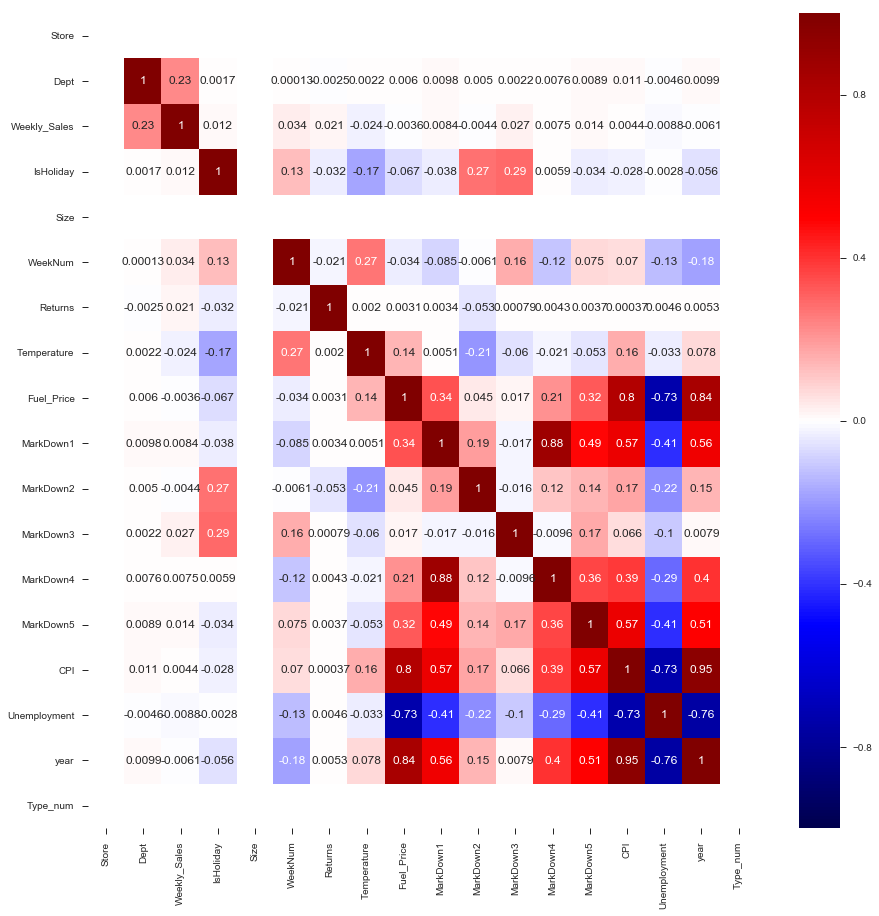

In [53]:
plt.figure(figsize=(15,15))
#cmap = colors.ListedColormap(['darkblue','blue','white','pink','red'])
sns.heatmap(trainstore20.corr(),annot=True,cmap=plt.cm.seismic)

In [209]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,WeekNum,Returns,Temperature,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Rank,year,Type_num
0,1,1,2010-02-05,24924.50,False,A,151315,5,0.0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,B,2010,1
1,1,2,2010-02-05,50605.27,False,A,151315,5,0.0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,D,2010,1
2,1,3,2010-02-05,13740.12,False,A,151315,5,0.0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,B,2010,1
3,1,4,2010-02-05,39954.04,False,A,151315,5,0.0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,C,2010,1
4,1,5,2010-02-05,32229.38,False,A,151315,5,0.0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,C,2010,1


In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
WeekNum         421570 non-null int64
Returns         421570 non-null float64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Rank            421570 non-null object
year            421570 non-null int64
Type_num        421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(11), int64(6), 

In [211]:
train['IsHoliday']=train['IsHoliday'].astype(int)

In [212]:
train=train.drop('Type',axis=1)


Machine Learning Algorithm

In [213]:
X=train[['Store','Dept','IsHoliday','Size','WeekNum','Returns','Temperature',
         'Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type_num']]
       
y=train['Weekly_Sales']

In [214]:
from sklearn.cross_validation import train_test_split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [216]:
 #Feature Scaling


In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
sc_X = StandardScaler()


In [219]:
#X1_train=X_train.drop('Date',axis=1)

In [220]:
X_train = sc_X.fit_transform(X_train)

In [221]:
X_test = sc_X.transform(X_test)


In [222]:
sc_y = StandardScaler()


In [223]:
y_train = sc_y.fit_transform(y_train)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



In [224]:
from sklearn.linear_model import LinearRegression 

In [225]:
reg=LinearRegression()

In [226]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [227]:
reg.predict(X_test)

array([ 0.48729454,  0.33682298,  0.32229639, ..., -0.48152657,
        0.56104993,  0.14826548])

In [228]:
reg.score(X_train,y_train)


0.087978610769485877

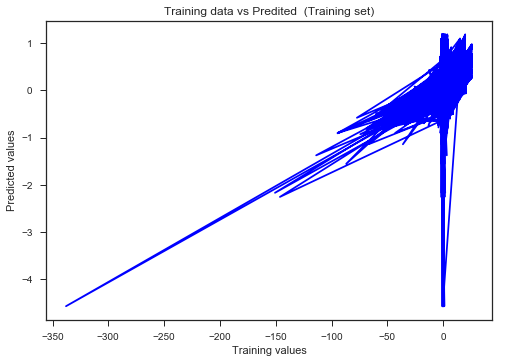

In [246]:
#plt.scatter(X_train.reshape(-1, 1), y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('Training data vs Predited  (Training set)')
plt.xlabel('Training values')
plt.ylabel('Predicted values')
plt.show()

In [74]:
import statsmodels.formula.api as sm


In [76]:
X=np.append(arr=np.ones((421570,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,6,7,8,9,10,11,12,13,14,15,16]]
reg_ols=sm.OLS(y,X_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     291.4
Date:                Sun, 07 May 2017   Prob (F-statistic):               0.00
Time:                        22:21:15   Log-Likelihood:            -4.8252e+06
No. Observations:              421570   AIC:                         9.650e+06
Df Residuals:                  421558   BIC:                         9.651e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.259e+04    206.776     60.875      0.000    1.22e+04     1.3e+04
x1          1.259e+04    206.776     60.875      0.000    1.22e+04     1.3e+04
x2            33.5436      2.604     12.881      0.000      28.440      38.647
x3            18.5908      2.614      7.113      0.000      13.468      23.714
x4            15.5358      2.104      7.383      0.000      11.412      19.660
x5         -1466.6086     84.709    -17.313      0.000   -1632.636   -1300.581
x6             0.1646      0.012     14.153      0.000       0.142       0.187
x7             0.0503      0.007      7.064      0.000       0.036       0.064
x8             0.1463      0.006     22.901      0.000       0.134       0.159
x9            -0.0311      0.017     -1.855      0.064      -0.064       0.002
x10            0.1908      0.009     20.487      0.000       0.173       0.209
x11          -23.1465      0.990    -23.385      0.000     -25.086     -21.207
x12         -366.8213     20.132    -18.220      0.000    -406.280    -327.362
==============================================================================
Omnibus:                   308190.110   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8544906.884
Skew:                           3.235   Prob(JB):                         0.00
Kurtosis:                      24.086   Cond. No.                     3.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
X=np.append(arr=np.ones((421570,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,6,7,9,11,12,13,14,15,16,17]]
reg_ols=sm.OLS(y,X_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2786.
Date:                Sun, 07 May 2017   Prob (F-statistic):               0.00
Time:                        22:21:23   Log-Likelihood:            -4.8133e+06
No. Observations:              421570   AIC:                         9.627e+06
Df Residuals:                  421559   BIC:                         9.627e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3025.1197    139.203     21.732      0.000    2752.285    3297.954
x1          3025.1197    139.203     21.732      0.000    2752.285    3297.954
x2             0.0896      0.001    157.607      0.000       0.088       0.091
x3            33.2339      2.523     13.174      0.000      28.289      38.178
x4            20.1590      1.998     10.088      0.000      16.243      24.075
x5            -0.0232      0.011     -2.111      0.035      -0.045      -0.002
x6             0.0131      0.007      1.892      0.058      -0.000       0.027
x7             0.1150      0.006     18.525      0.000       0.103       0.127
x8             0.0623      0.016      3.864      0.000       0.031       0.094
x9             0.0560      0.009      6.207      0.000       0.038       0.074
x10          -16.7492      0.934    -17.941      0.000     -18.579     -14.919
x11         -211.2538     19.511    -10.828      0.000    -249.494    -173.013
==============================================================================
Omnibus:                   306553.014   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9241345.306
Skew:                           3.175   Prob(JB):                         0.00
Kurtosis:                      25.040   Cond. No.                     5.67e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
X=np.append(arr=np.ones((421570,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,7,8,9,11,12,13,14,15,16,17]]
reg_ols=sm.OLS(y,X_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2775.
Date:                Sun, 07 May 2017   Prob (F-statistic):               0.00
Time:                        22:21:37   Log-Likelihood:            -4.8133e+06
No. Observations:              421570   AIC:                         9.627e+06
Df Residuals:                  421559   BIC:                         9.627e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3068.6056    175.121     17.523      0.000    2725.375    3411.837
x1          3068.6056    175.121     17.523      0.000    2725.375    3411.837
x2             0.0894      0.001    157.258      0.000       0.088       0.091
x3            39.8109      2.440     16.319      0.000      35.029      44.592
x4            19.4940      2.541      7.671      0.000      14.513      24.475
x5          -415.8834     80.460     -5.169      0.000    -573.583    -258.184
x6             0.0046      0.011      0.402      0.688      -0.018       0.027
x7             0.0002      0.007      0.023      0.982      -0.013       0.013
x8             0.1111      0.006     17.969      0.000       0.099       0.123
x9             0.0394      0.016      2.413      0.016       0.007       0.071
x10            0.0645      0.009      7.115      0.000       0.047       0.082
x11          -12.9579      0.884    -14.662      0.000     -14.690     -11.226
==============================================================================
Omnibus:                   306369.702   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9202367.486
Skew:                           3.174   Prob(JB):                         0.00
Kurtosis:                      24.991   Cond. No.                     2.61e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
X=np.append(arr=np.ones((421570,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,7,8,11,12,13,14,15,16,17]]
reg_ols=sm.OLS(y,X_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3033.
Date:                Sun, 07 May 2017   Prob (F-statistic):               0.00
Time:                        22:21:44   Log-Likelihood:            -4.8136e+06
No. Observations:              421570   AIC:                         9.627e+06
Df Residuals:                  421560   BIC:                         9.627e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.5754    145.288     11.540      0.000    1391.816    1961.335
x1          1676.5754    145.288     11.540      0.000    1391.816    1961.335
x2           587.2392    142.416      4.123      0.000     308.107     866.371
x3             0.0898      0.001    157.863      0.000       0.089       0.091
x4            19.8550      1.908     10.408      0.000      16.116      23.594
x5          -323.9485     80.053     -4.047      0.000    -480.850    -167.047
x6            -0.0080      0.011     -0.707      0.480      -0.030       0.014
x7             0.0074      0.007      1.042      0.297      -0.006       0.021
x8             0.1201      0.006     18.758      0.000       0.108       0.133
x9             0.0389      0.016      2.388      0.017       0.007       0.071
x10            0.0686      0.009      7.614      0.000       0.051       0.086
==============================================================================
Omnibus:                   306610.404   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9246690.733
Skew:                           3.176   Prob(JB):                         0.00
Kurtosis:                      25.047   Cond. No.                     1.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
X_new=train[['Store','Dept','IsHoliday','Size','WeekNum','Returns','Temperature',
         'Fuel_Price','MarkDown1','MarkDown2','CPI']]
       
y=train['Weekly_Sales']

In [81]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [82]:
#X_train_new = sc_X.fit_transform(X_train_new)


In [83]:
reg.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
reg.predict(X_test_new)

array([ 27371.36104087,  22975.02089212,  23371.06046916, ...,
         4514.81579727,  28364.98152336,  20280.22377105])

In [85]:
reg.score(X_train_new,y_train)

0.086131604847439425

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
X_new2=train[['Store','Dept','IsHoliday','Size','WeekNum','Returns','Temperature',
         'Fuel_Price','MarkDown1','MarkDown2','CPI']]
       
y=train['Weekly_Sales']

In [88]:
X_train_new2, X_test_new, y_train, y_test = train_test_split(X_new2, y, test_size = 0.2, random_state = 0)

In [89]:
dtree = DecisionTreeRegressor()

In [90]:
dtree.fit(X_train_new2,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [91]:
predic=dtree.predict(X_test_new)
predic

array([  3659.63,  91196.27,   4803.12, ...,   2640.63,  25968.15,
         9291.83])

In [92]:
dtree.score(X_train_new2,y_train)

1.0

In [93]:
dtree.feature_importances_


array([  7.54208904e-02,   6.34406568e-01,   1.33611345e-03,
         1.87675978e-01,   4.99333530e-02,   3.20644133e-06,
         1.05589430e-02,   5.37732407e-03,   2.73591166e-03,
         1.57836768e-03,   3.09733443e-02])

In [94]:
dtree2 = DecisionTreeRegressor(max_depth=5,min_samples_split=5)

In [95]:
dtree2.fit(X_train_new2,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [96]:
dtree2.score(X_train_new2,y_train)

0.54060665353374326

In [ ]:
asda-breaksd

In [ ]:
 clf = RandomForestRegressor(n_estimators = 4800,max_features = 2, bootstrap = True)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
dfSampleSubmission=pd.read_csv('sampleSubmission.csv')

In [ ]:
j = 0

In [ ]:
#parsing through ID column and assigning it to a variable tmpId
tmpId = dfSampleSubmission['Id'][j]

In [ ]:
tmpStr = tmpId.split('_')

In [ ]:
# Store store value in a temp variable
tmpStore = int(tmpStr[0])

In [ ]:
# Store Dept value in a temp variable
tmpDept = int(tmpStr[1])

In [ ]:
# realign dataframe in Dept order
dataF1 = train[train['Dept'] == tmpDept]

In [ ]:
#Creating a variable to store length of index where Store equals temp store
tmpL = len(dataF1[dataF1['Store'] == tmpStore].index)

In [ ]:
# variable to store holiday
tmpF = dataF1[dataF1['IsHoliday'] == 1]

In [ ]:
dataF1 = dataF1.append(pd.concat([tmpF] * 4))

In [ ]:
dataF2 = dataF1[dataF1['Store'] == tmpStore]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
 clf = RandomForestRegressor(n_estimators = 4800,max_features = 4, bootstrap = True)

In [ ]:
if(tmpL < 10):
    columns = list(dataF1.columns[i] for i in [1, 2,3, 4, 5])

    y = np.array(dataF1['Weekly_Sales'], dtype= np.float64)
    clf.fit(dataF1[columns],y )
else:
    columns = list(dataF2.columns[i] for i in [6,7, 8, 9, 10])
    y = np.array(dataF2['Weekly_Sales'], dtype= np.float64)
    clf.fit(dataF2[columns],y )

 tmpP = np.exp(clf.predict(testF1[columns]))-4990 
k = j + testRows
dfSampleSubmission.to_csv('outputPy.csv')